## Exploratory Data Analysis & Intro

### Goal

1. Investigate salary trends and top-paying skills in the data analytics industry within United States.
2. Use Python to explore a real-world dataset on job postings (from December 2022 to April 2025).
3. For individuals considering tapping into the data analytics field: use these insigts to find the most in-demand and/or the highest-paying
   skills to learn.
4. For job-seekers: use these insights to help find job opportunities.

### Final Deliverables:

- Jupyter Notebooks (showcasing codes and visualizations).
- Summary of analysis and findings (via [README.md](README.md)).
- Project shared via GitHub & LinkedIn.

### Objectives

- A. What does the distribution of salary look like overall? 
- B. In what locations or regions are most companies hiring? 
- C. How are salaries trending? 
- D. What are the most optimal skills to learn for Data Analysts? (High-demand vs. high-paying) 
- E. For job seekers: How likely it is to get a job without a degree, and how reasonable it is to expect WFH & health benefits?

In [65]:
import ast
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns
from adjustText import adjust_text

df = pd.read_csv('/Users/andreawei/Documents/Learnings/Python Project/Datasets/jobs_data_final.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.dropna(subset='salary_standardized')

### Job Posting Platforms to Explore

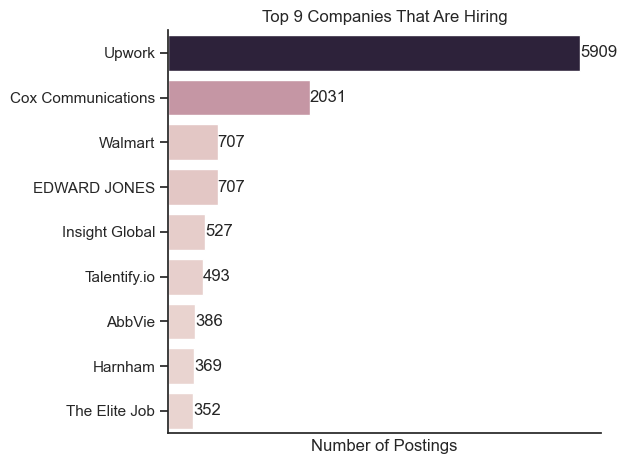

In [66]:
df_company = df.groupby('company_name').agg(post_count=('company_name', 'count')).sort_values(by='post_count', ascending=False).head(9)
df_company = df_company.reset_index()

sns.barplot(data=df_company, x='post_count', y='company_name', hue='post_count')

sns.despine()
sns.set_theme(style='ticks')

plt.legend().remove()
plt.title('Top 9 Companies That Are Hiring')
plt.ylabel('')
plt.xlabel('Number of Postings')

for i, v in enumerate(df_company['post_count']):
    plt.text(v, i, f'{v}', va='center')

plt.xticks([])
plt.tight_layout()
plt.show()

### Job Posting Platforms to Explore

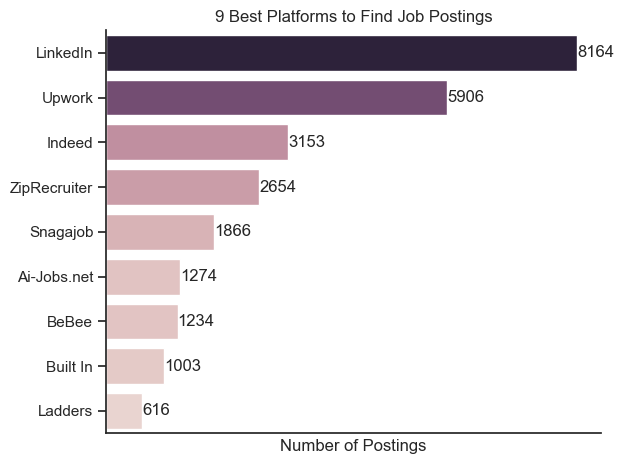

In [67]:
df_platform = df.groupby('platform').agg(pf_count=('platform', 'count')).sort_values(by='pf_count', ascending=False).head(9)
df_company = df_platform.reset_index()

sns.barplot(data=df_platform, x='pf_count', y='platform', hue='pf_count')

sns.despine()
sns.set_theme(style='ticks')

plt.legend().remove()
plt.title('9 Best Platforms to Find Job Postings')
plt.ylabel('')
plt.xlabel('Number of Postings')

for i, v in enumerate(df_company['pf_count']):
    plt.text(v, i, f'{v}', va='center')

plt.xticks([])
plt.tight_layout()
plt.show()

### Employment/Engagement Types

(Note: "Other" refers to a combination of any two or more of the following: full-time, part-time, contractor, intership, temporary work)

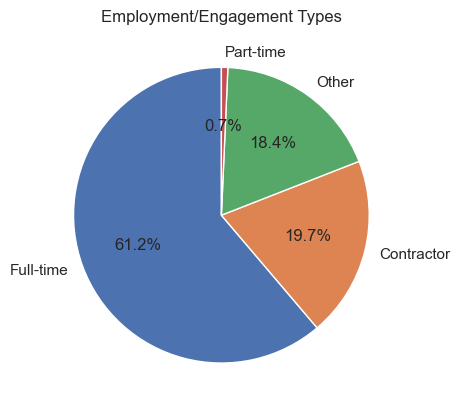

In [68]:
df['engagement_type'] = df['schedule_type'].apply(lambda x: 'Full-time' if x == 'Full-time' else 'Part-time' if x == 'Part-time' else 'Contractor' if x == 'Contractor' else 'Other')

df_type = df.groupby('engagement_type').agg(type_count=('engagement_type', 'count')).sort_values(by='type_count', ascending=False)

plt.pie(df_type['type_count'], labels=df_type.index, autopct='%1.1f%%', startangle=90)
plt.title('Employment/Engagement Types')
plt.show()
